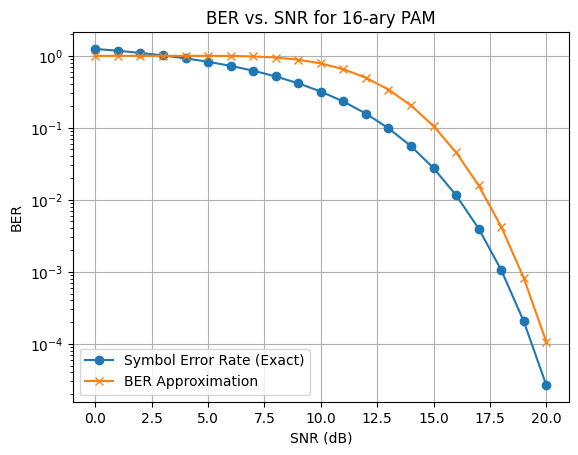

In [9]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

M = 16  

snr_dB_range = np.arange(0, 21, 1)

ber_symbol = []
ber_approx = []

for snr_dB in snr_dB_range:
    snr = 10 ** (snr_dB / 10.0)  

    pe = 2 * (1 - 1 / M) * erfc(np.sqrt(6 * snr * np.log2(M) / (M ** 2 - 1)))

    ber_symbol.append(pe)
    ber_approx.append((1 - (1 - pe) ** np.log2(M)))

# Plot BER vs SNR
plt.figure()
plt.semilogy(snr_dB_range, ber_symbol, marker='o', label='Symbol Error Rate (Exact)')
plt.semilogy(snr_dB_range, ber_approx, marker='x', label='BER Approximation')
plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title(f'BER vs. SNR for {M}-ary PAM')
plt.legend()
plt.grid()
plt.show()


 


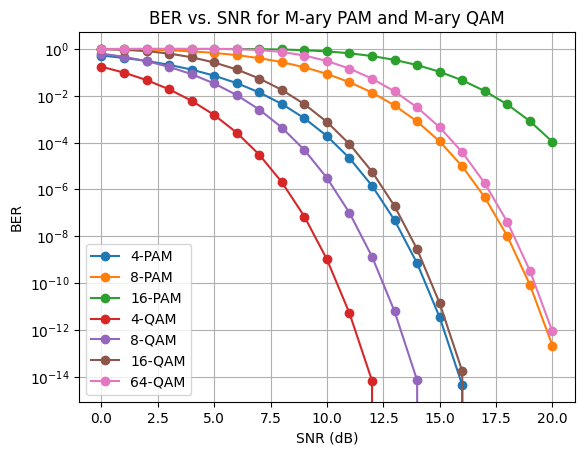

In [14]:
import numpy as np
from scipy.special import erfc
import matplotlib.pyplot as plt

modulation_orders = {
    'PAM': [4, 8, 16],  
    'QAM': [4, 8, 16, 64]   
}


snr_dB_range = np.arange(0, 21, 1)


ber_results = {key: [] for key in modulation_orders.keys()}

# Loop through each modulation scheme
for modulation_type, modulation_order_list in modulation_orders.items():
    for M in modulation_order_list:
        ber_modulation = []
        for snr_dB in snr_dB_range:
            snr = 10 ** (snr_dB / 10.0)

            if modulation_type == 'PAM':
                pe = 2 * (1 - 1 / M) * erfc(np.sqrt(6 * snr * np.log2(M) / (M ** 2 - 1)))
            elif modulation_type == 'QAM':
                pe = 4 * (1 - 1 / np.sqrt(M)) * erfc(np.sqrt(3 * snr * np.log2(M) / (M - 1)))

            ber_modulation.append((1 - (1 - pe) ** np.log2(M)))
        ber_results[modulation_type].append(ber_modulation)


plt.figure()
for modulation_type, modulation_order_list in modulation_orders.items():
    for i, M in enumerate(modulation_order_list):
        plt.semilogy(snr_dB_range, ber_results[modulation_type][i], marker='o', label=f'{M}-{modulation_type}')

plt.xlabel('SNR (dB)')
plt.ylabel('BER')
plt.title('BER vs. SNR for M-ary PAM and M-ary QAM')
plt.legend()
plt.grid()
plt.show()
